<a href="https://colab.research.google.com/github/dxdiego5/MachineLearning/blob/main/ATIV_ENGENHARIA_MACHINE_LEARNIG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
dados = pd.read_csv('DF_FINAL.csv', sep=';')

In [ ]:
dados.dropna(inplace=True)
# df = dados.drop(columns=['Time Stamp'])

In [ ]:
for coluna in dados.columns[1:]:
  dados[coluna] = dados[coluna].str.replace(',','.').astype(float)

In [ ]:
dados.head()

,Time Stamp,Medicao1,Medicao2,Medicao3,Medicao4,Medicao5
0,13:42:16,-0.0215,-0.3440,-0.8579,-0.8112,0.1274
1,13:42:16,0.1001,0.1028,-0.3049,-0.8844,0.2127
2,13:42:16,-0.0012,0.0783,0.2281,-0.8555,0.4372
3,13:42:16,-0.0562,0.7773,0.4201,0.3201,-0.0378
4,13:42:16,-0.0547,0.2061,0.9826,0.1338,-0.2223


In [ ]:
dadosFiltred = dados[['Medicao1','Medicao2']]

In [ ]:
dadosFiltred.head()

,Medicao1,Medicao2
0,-0.0215,-0.3440
1,0.1001,0.1028
2,-0.0012,0.0783
3,-0.0562,0.7773
4,-0.0547,0.2061


In [ ]:
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from sklearn.preprocessing import MaxAbsScaler 
scaler = MaxAbsScaler()

In [ ]:
scaled_data = scaler.fit_transform(dadosFiltred)

In [ ]:
scaled_data

array([[-0.03769946, -0.16796875],
       [ 0.17552166,  0.05019531],
       [-0.00210416,  0.03823242],
       ...,
       [-0.12642469,  0.09370117],
       [-0.2873926 , -0.24833984],
       [-0.36419428, -0.33911133]])

In [ ]:
sse = []
for k in range(1, 8):
    print(k)
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(scaled_data)
    sse.append(kmeans.inertia_)

1
2
3
4
5
6
7


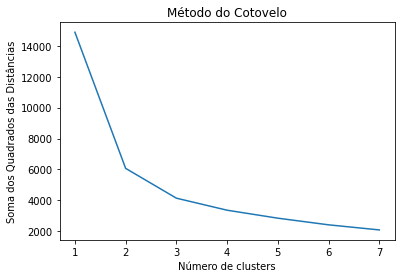

In [ ]:
# Plota o gráfico do método do cotovelo
plt.plot(range(1, 8), sse)
plt.title('Método do Cotovelo')
plt.xlabel('Número de clusters')
plt.ylabel('Soma dos Quadrados das Distâncias')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(scaled_data)

cluster_assignments = kmeans.labels_

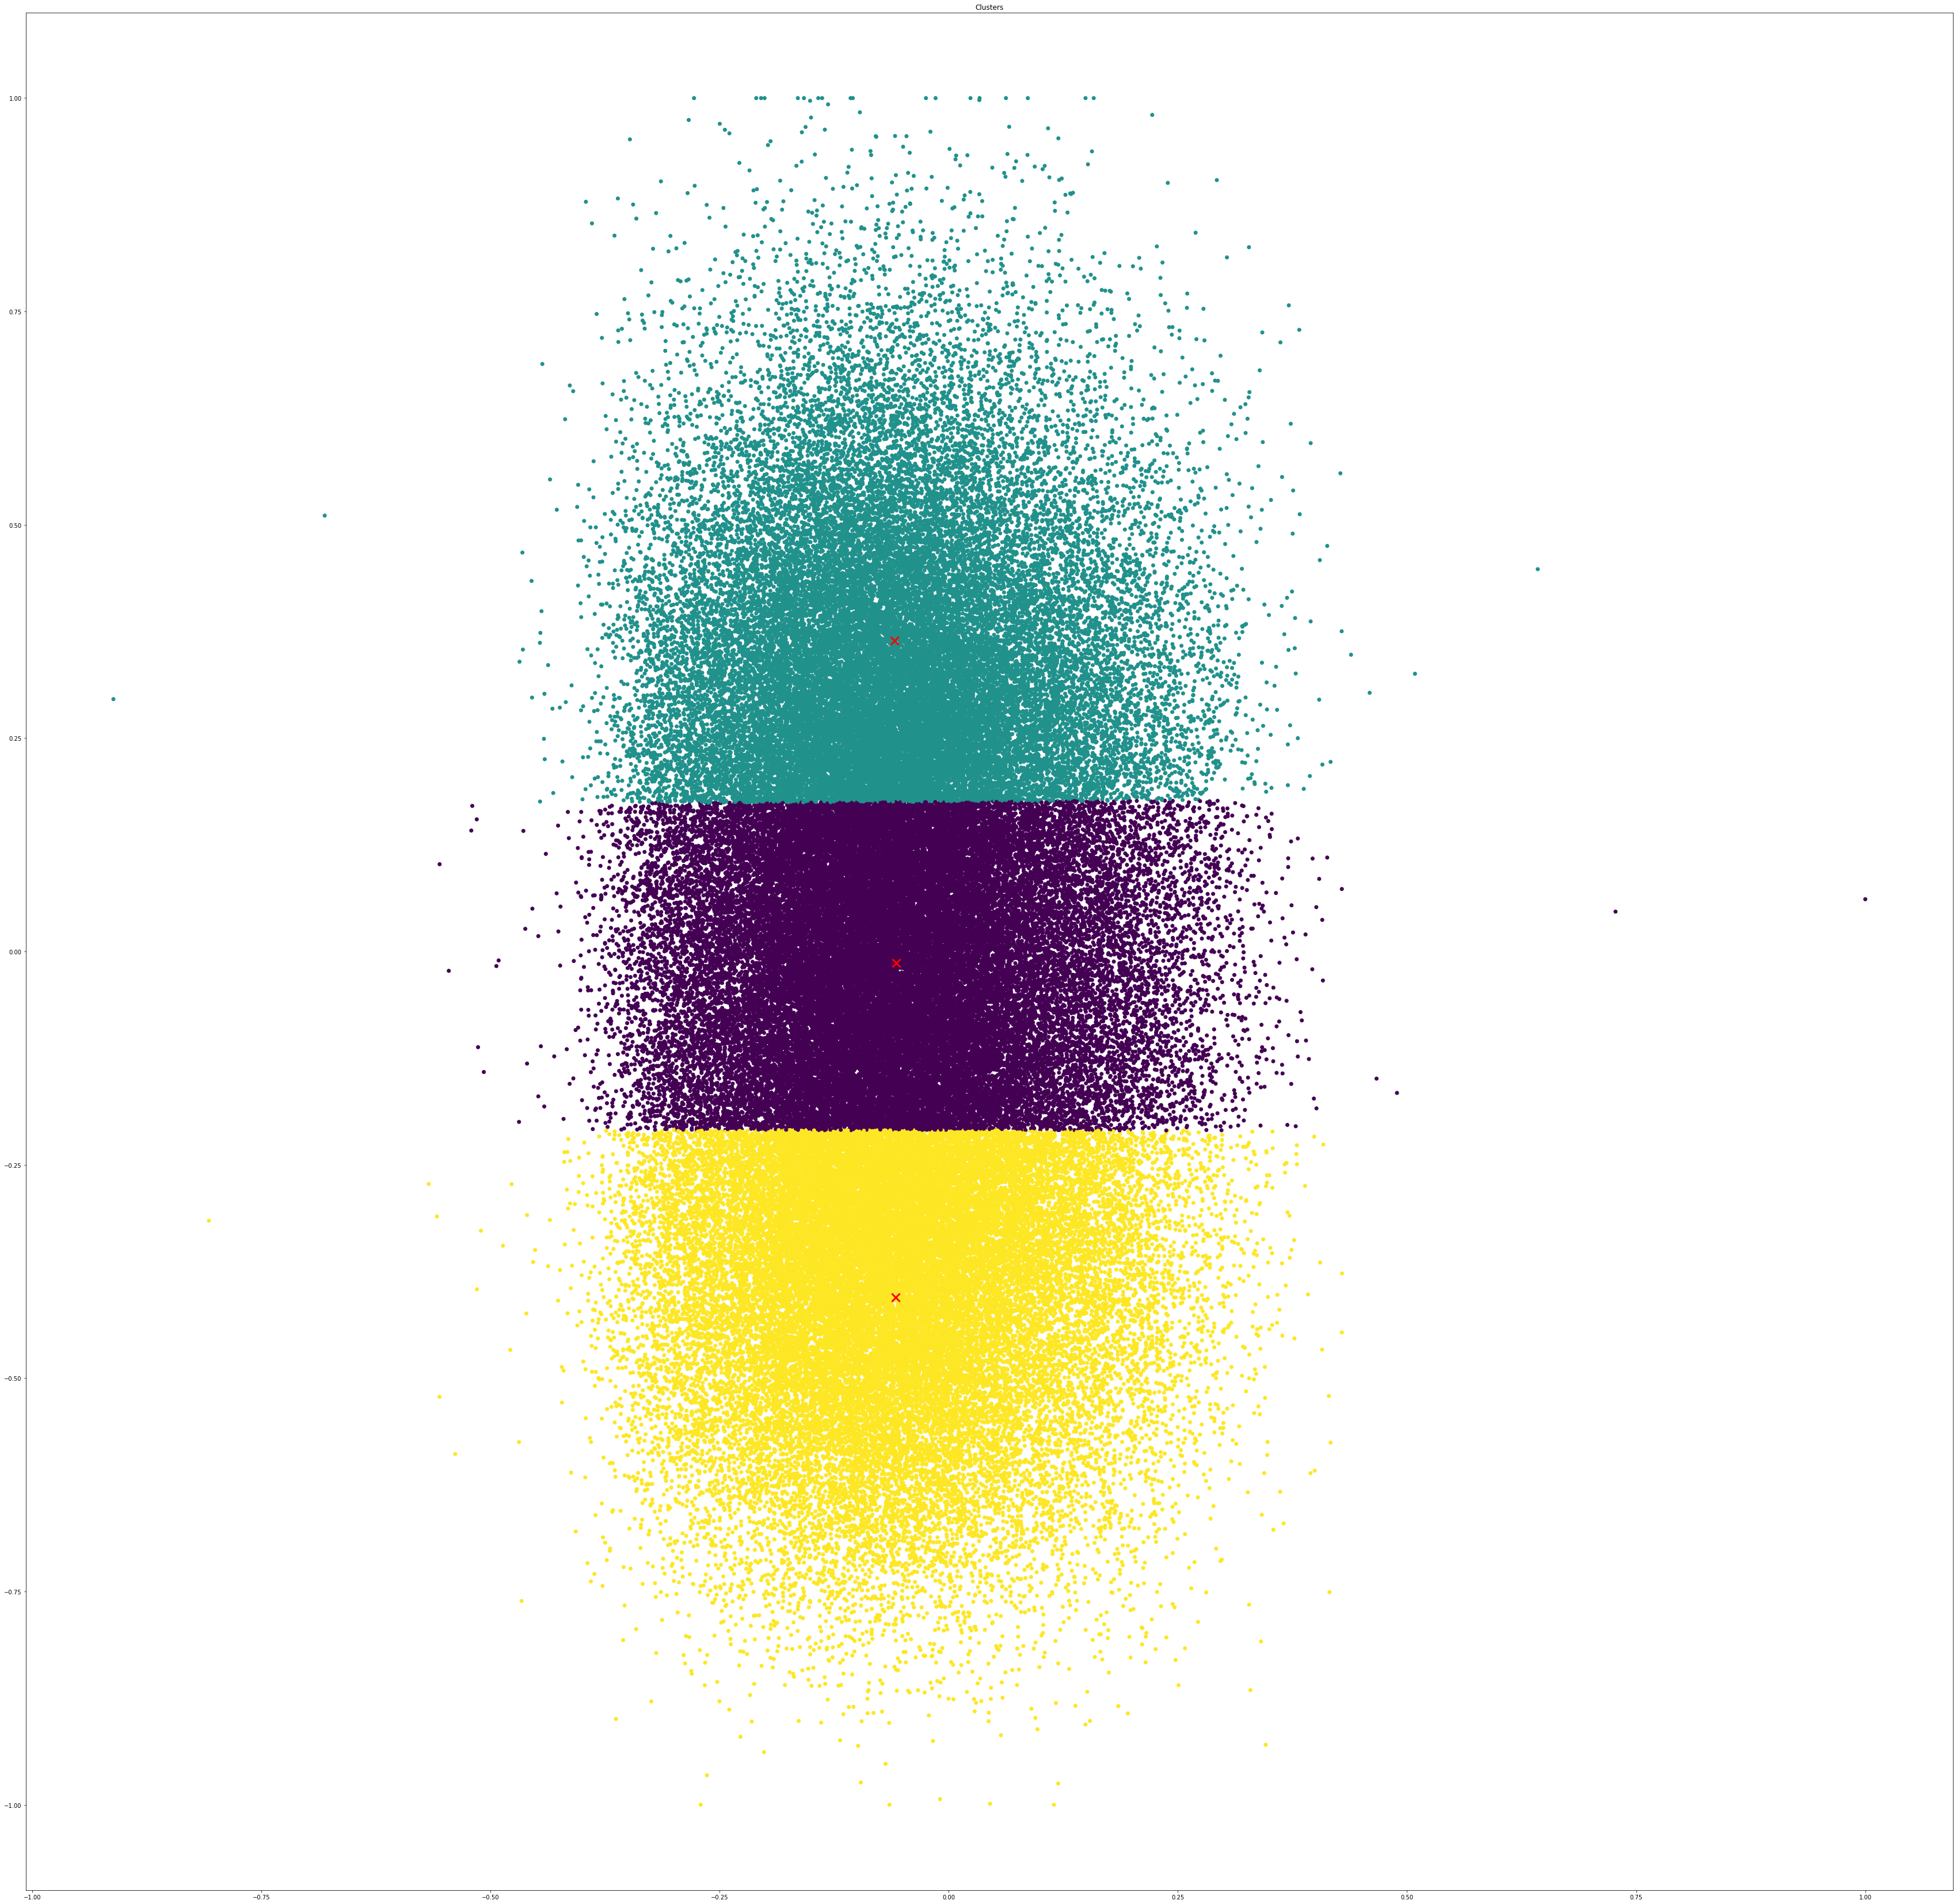

In [ ]:
# Plota o gráfico dos clusters
plt.figure(figsize=(60, 60))
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='x', s=200, linewidths=3, color='r')
plt.title('Clusters')
plt.show()